In [18]:
import os,sys,inspect

# magagna per importare la cartella padre. 
# TODO: aggiustare con il setup giusto nel caso diventassimo famosi
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
sys.path.insert(0,'C:\\Users\\Valerio\\Documents\\GitHub\\CASTLE\\utils')

import pandas as pd
import sklearn 
import sklearn.preprocessing 
import sklearn.ensemble
import numpy as np
import clustering_utils as cu

ModuleNotFoundError: No module named 'cluster_utils'

In [3]:
path = 'spambase.csv'

dataset = pd.read_csv(path,header=None).to_numpy()
labels = dataset[:,-1]
dataset = dataset[:,:-1]

In [4]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)

clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
                                              max_depth=4,
                                              random_state=0)
scores = sklearn.model_selection.cross_val_score(clf, dataset, labels, cv=10,scoring='accuracy')

print("accuracy =", np.mean(scores))
print("std_dev = ",np.std(scores))

clf.fit(dataset,labels)
model_labels = clf.predict(dataset)

accuracy = 0.914561196249592
std_dev =  0.028419917503289226


In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(scaled_dataset, 'ward')


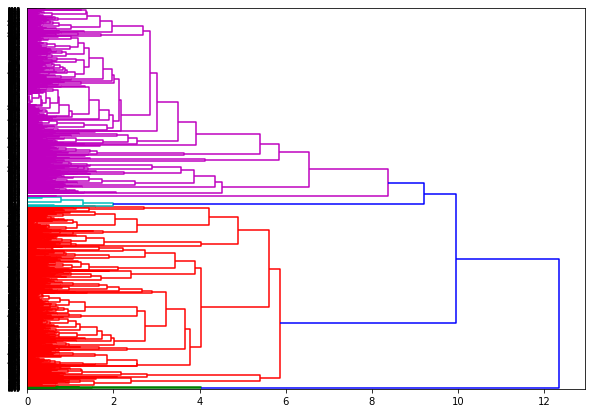

In [6]:
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='right',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5)
cluster_assignments = clustering.fit_predict(scaled_dataset)

In [14]:
c_0 = []
c_1 = []
dimensionality = dataset.shape[1]

clusters, counts = np.unique(cluster_assignments[cluster_assignments >= 0],return_counts =True)

for i in range(len(clusters)):
    print('Cluster ',i,' - ',counts[i],' ',cu.compute_purity(clusters[i], cluster_assignments, model_labels))
    major_class,_ = cu.compute_purity(clusters[i], cluster_assignments, model_labels)
    #print(major_class)
    if major_class == 0:
        c_0.append( (i,counts[i],cu.compute_cluster_description(clusters[i], cluster_assignments, dataset, dimensionality)) )
    else:
        c_1.append( (i,counts[i],cu.compute_cluster_description(clusters[i], cluster_assignments, dataset, dimensionality)) )

NameError: name 'cu' is not defined